In [ ]:
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict, Counter

## Step 1

Place youself id the directory `Data/clusters` on Drive. Run the following cell.

In [ ]:
"""
This cell is customized for data on my laptop. 
"""

# Define path of data
#data = 'data/'
articles_file = 'covid_articles_updated.p'


# Open the file
dict_articles = pickle.load(open(articles_file, 'rb'))


with open('level_1_clusters.pickle', 'rb') as handle:
    level_1 = pickle.load(handle)
    
level_1_names = defaultdict(list)
for k, a in level_1.items():
    for i in a:
        level_1_names[k].append(dict_articles[i]['title'])
        
with open('level_2_cluster_8.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['title'])
        
level_1_names[8] = level_2_names



with open('level_3_cluster_8_1.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['title'])
        
level_1_names[8][1] = level_2_names

with open('level_2_cluster_9.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['title'])
        
level_1_names[9] = level_2_names

with open('level_3_cluster_9_1.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['title'])
        
level_1_names[9][1] = level_2_names

In [ ]:
for i,j in level_1_names.items():
    print(i, len(j))

8 10
9 10
4 43
2 67
1 44
6 15
7 16
5 10
3 21
0 26


 The previous cell returns a dictionary whose keys are the first level clusters and the other levels keys are clusters at lower level.
 
Here two examples:

In [ ]:
"""
This cell is customized for data on my laptop. 
"""

# Define path of data
#data = 'data/'
articles_file = 'covid_articles_updated.p'


# Open the file
dict_articles = pickle.load(open(articles_file, 'rb'))


with open('level_1_clusters.pickle', 'rb') as handle:
    level_1 = pickle.load(handle)
    
level_1_names = defaultdict(list)
for k, a in level_1.items():
    for i in a:
        level_1_names[k].append(dict_articles[i]['abstract'])
        
with open('level_2_cluster_8.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['abstract'])
        
level_1_names[8] = level_2_names



with open('level_3_cluster_8_1.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['abstract'])
        
level_1_names[8][1] = level_2_names

with open('level_2_cluster_9.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['abstract'])
        
level_1_names[9] = level_2_names

with open('level_3_cluster_9_1.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['abstract'])
        
level_1_names[9][1] = level_2_names

In [ ]:
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from os import path
import pickle

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

In [ ]:
for i,j in level_1_names[9][1].items():
    print(i, len(j))

0 710
3 14
2 18
8 6
1 8
7 10
5 7
4 9
6 10
9 11


In [ ]:
stop_words = list(STOPWORDS) + ['preprint', 'license', 'medrxiv', 'copyright', 'reviewed',
                                'peer', 'patients', 'covid', 'author', 'may', 'figure', 'used', 
                               'funded', 'made', 'cases', 'available', 'display', 'funder', 'granted', 'study', 'SARS',
                               'CoV', 'infection', 'coronavirus', 'pandemic', 'severe']

In [ ]:
single_words = ' '.join([j for i in level_1_names[0] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

In [ ]:
level_1_names[0]

[["§les auteurs ont contribué à part égale à cet article Résumé Objectif: L'absence de préparation du système de soins psychiatriques à l'épidémie de virus SARS-CoV-2 fait redouter fait redouter un scénario pessimiste pour la santé physique et mentale des patients suivis en psychiatrie",
  "L'objectif de cet article est de proposer des éléments de guidance pour réorganiser les soins psychiatriques dans le contexte de pandémie COVID-19",
  'Méthode : Les auteurs ont réalisé une synthèse de la littérature internationale combinée au partage des expériences locales françaises',
  "Résultats : Les patients souffrant de troubles psychiques semblent particulièrement vulnérables à ce virus et à la pandémie : vulnérabilités liées aux comorbidités médicales, à l'âge, aux troubles cognitifs qui peuvent entraver le respect des consignes de confinement, et aux complications psychosociales",
  "Plusieurs initiatives ont été prises pour assurer la continuité des soins et contenir l'épidémie : créatio

In [ ]:
single_words = ' '.join([j for i in level_1_names[1] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

In [ ]:
level_1_names[1]

[['Title Page Running Title: Breastfeeding of COVID-19 Mothers Breastfeeding of Infants Born to Mothers with COVID-19: A Rapid Review'],
 ['Clinical features and sexual transmission potential of SARS-CoV-2 infected female patients: a descriptive study in Wuhan, China'],
 ['CORONAVIRUS IN PREGNANCY AND DELIVERY: RAPID REVIEW AND EXPERT CONSENSUS'],
 ['Clinical features and the maternal and neonatal outcomes of pregnant women with coronavirus disease 2019'],
 ['Commentary Title: COVID-19 and maternal mental health: Are we getting the balance right?'],
 ['Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV-2) Infection During Pregnancy In China: A Retrospective Cohort Study'],
 ['Clinical characteristics of COVID-19 infection in pregnant women: a systematic review and meta-analysis'],
 [''],
 ['Pregnancy and breastfeeding during COVID-19 pandemic: A systematic review of Authors 4 * Equal contribution Corresponding author 22 Disclosure statement Short title'],
 ['Laboratory Findings 

(-0.5, 399.5, 199.5, -0.5)

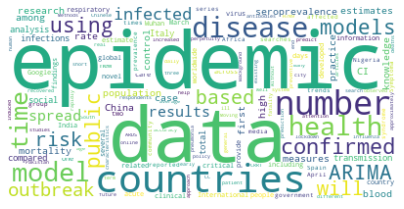

In [ ]:
single_words = ' '.join([j for i in level_1_names[2] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[2]

[['INFODEMIOLOGICAL STUDY USING GOOGLE TRENDS ON CORONAVIRUS EPIDEMIC IN WUHAN, CHINA DRAFT'],
 ['An artificial intelligence-based first-line defence against COVID-19: digitally screening citizens for risks via a chatbot'],
 ['Heparin-induced thrombocytopenia is associated with a high risk of mortality in critical COVID-19 patients receiving heparin-involved treatment'],
 ['Outbound traffic from Wuhan and COVID-19 incidence Temporal relationship between outbound traffic from Wuhan and the 2019 coronavirus disease (COVID-19) incidence in China'],
 ['SARS-CoV-2 infection does not significantly cause acute renal injury: an analysis of 116 hospitalized patients with COVID-19 in a single hospital, Wuhan, China'],
 ['TITLE PAGE Full Length Manuscript Title: Forecasting of COVID-19 Cases and Deaths Using ARIMA Models Running Title: ARIMA Models in COVID-19 Written by'],
 ['Estimation of the Final Size of the COVID-19 Epidemic in Pakistan'],
 ['deepMINE -Natural Language Processing based Autom

In [ ]:
single_words = ' '.join([j for i in level_1_names[3] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

In [ ]:
level_1_names[3]

[['Analysis of the Worldwide Corona Virus (COVID-19) Pandemic Trend; A Modelling Study to Predict Its Spread',
  'Running Title: A mathematical model to predict worldwide COVID19 Spread'],
 ['Title: Estimating the risk of COVID-19 death during the course of the outbreak in Korea'],
 ['Title: Transmission potential of COVID-19 in South Korea'],
 ['Potential roles of social distancing in mitigating the spread of coronavirus disease 2019 (COVID-19) in South Korea Funding statement'],
 ['Increased Detection coupled with Social Distancing and Health Capacity Planning Reduce the Burden of COVID-19 Cases and Fatalities: A Proof of Concept Study using a Stochastic Computational Simulation Model'],
 ['Spatial Visualization of Cluster-Specific COVID-19 Transmission Network in South Korea During the Early Epidemic Phase'],
 ['Impacts of Early Interventions on the Age-Specific Incidence of COVID-19 in New York, Los Angeles, Daegu and Nairobi'],
 ['Analysis of COVID-19 spread in South Korea using t

(-0.5, 399.5, 199.5, -0.5)

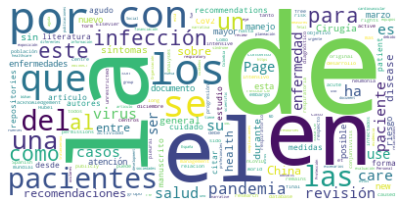

In [ ]:
single_words = ' '.join([j for i in level_1_names[4] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[4]

[['Daily growth rate of scientific production on Covid-19',
  'Analysis in databases and open access repositories @torressalinas -Universidad de Granada'],
 ['Journal Pre-proof'],
 ['ARTICLE IN PRESS'],
 ['Journal Pre-proof COVID19-Tracker: una aplicación web para visualización de datos de la epidemia de SARS-CoV-2 en España COVID19-Tracker: una aplicación web para visualización de datos de la epidemia de SARS-CoV-2 en España'],
 ['in China'],
 ['ATENCIÓN DE LA URGENCIA QUIRÚRGICA DURANTE LA PANDEMIA COVID-19',
  'RECOMENDACIONES DE LA ASOCIACIÓN ESPAÑOLA DE CIRUJANOS EMERGENCY SURGERY AND TRAUMA CARE DURING COVID-19 PANDEMIC',
  'RECOMMENDATIONS OF THE SPANISH ASSOCIATION OF SURGEONS'],
 ['Journal Pre-proof'],
 ['Autores: 1-Inés'],
 ['ARTICLE IN PRESS +Model Revista Española de Anestesiología y Reanimación ARTICLE IN PRESS +Model'],
 ['Journal Pre-proof Coronavirus: la emergencia geriátrica de 2020',
  'Documento conjunto de la Sección de Cardiología Geriátrica de la Sociedad Española

(-0.5, 399.5, 199.5, -0.5)

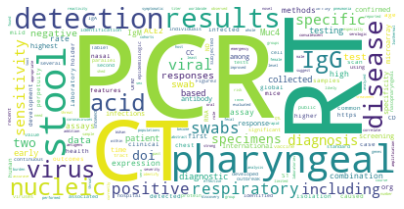

In [ ]:
single_words = ' '.join([j for i in level_1_names[5] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[5]

[['Global profiling of SARS-CoV-2 specific IgG/ IgM responses of convalescents using a proteome microarray'],
 ['Analysis of SARS-CoV-2 Antibodies in COVID-19 Convalescent Plasma using a Coronavirus Antigen Microarray'],
 ['Distinct early IgA profile may determine severity of COVID-19 symptoms: an immunological case series'],
 ['Mucin 4 Protects Female Mice from Coronavirus Pathogenesis'],
 ['ACE2 and TMPRSS2 variants and expression as candidates to sex and country differences in COVID-19 severity in Italy'],
 [''],
 ['Analysis of Serologic Cross-Reactivity Between Common Human Coronaviruses and SARS-CoV-2 Using Coronavirus Antigen Microarray'],
 ['Application and optimization of RT-PCR in diagnosis of SARS-CoV-2 infection'],
 ['Recent advances and perspectives of nucleic acid detection for coronavirus-NC-ND license (http://creativecommons.org/licenses/by-nc-nd/4.0/)'],
 ['Journal Pre-proof Comparison of four new commercial serologic assays for determination of SARS-CoV-2 IgG Compariso

(-0.5, 399.5, 199.5, -0.5)

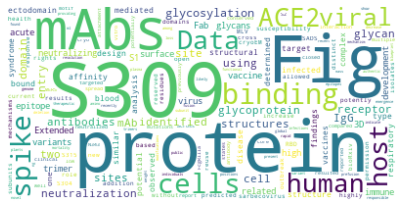

In [ ]:
single_words = ' '.join([j for i in level_1_names[6] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[6]

[['Title: Site-specific N-glycosylation Characterization of Recombinant SARS-CoV-2 Spike Proteins'],
 ['Extensive weight loss can reduce immune age by altering IgG N-glycosylation'],
 ['Identification of a common deletion in the spike protein of SARS-CoV-2'],
 ['Site-specific analysis of the SARS-CoV-2 glycan shield'],
 ['Cryo-electron microscopy structure of the SADS-CoV spike glycoprotein 1 provides insights into an evolution of unique coronavirus spike proteins 2 3'],
 ['Human ACE2 receptor polymorphisms predict SARS-CoV-2 susceptibility'],
 ['3D Models of glycosylated SARS-CoV-2 spike protein suggest challenges and opportunities for vaccine development'],
 ['Structural and functional analysis of a potent sarbecovirus neutralizing antibody 1 2'],
 ['Glycoinformatics approach for identifying target positions to inhibit initial binding of SARS-CoV-2 S1 protein to the host cell'],
 ['Deducing the N-and O-glycosylation profile of the spike protein of novel coronavirus SARS-CoV-2'],
 ['A

(-0.5, 399.5, 199.5, -0.5)

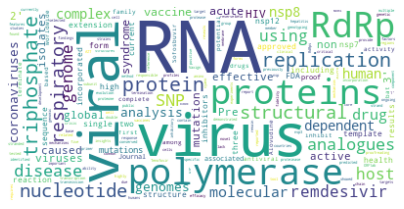

In [ ]:
single_words = ' '.join([j for i in level_1_names[7] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[7]

[['COVID-19 coronavirus vaccine design using reverse vaccinology and machine 1 learning 2 3'],
 ['Structural Basis for the Inhibition of the RNA-Dependent RNA Polymerase from SARS- CoV-2 by Remdesivir'],
 ['Nucleotide Analogues as Inhibitors of SARS-CoV Polymerase'],
 ['Nucleotide Analogues as Inhibitors of SARS-CoV-2 Polymerase'],
 ["Role of 1'-Ribose Cyano Substitution for Remdesivir to Effectively Inhibit both Nucleotide Addition and Proofreading in SARS-CoV- 2 Viral RNA Replication"],
 ['A SARS-CoV-2-Human Protein-Protein Interaction Map Reveals Drug Targets and Potential Drug- Repurposing Abbreviations: HC-PPIs: High confidence protein-protein interactions PPIs: protein-protein interaction AP-MS: affinity purification-mass spectrometry'],
 ['Structure of replicating SARS-CoV-2 polymerase'],
 ['When Darkness Becomes a Ray of Light in the Dark Times: Understanding the COVID-19 via the Comparative Analysis of the Dark Proteomes of SARS-CoV-2, Human SARS and Bat SARS-Like Coronaviruse

(-0.5, 399.5, 199.5, -0.5)

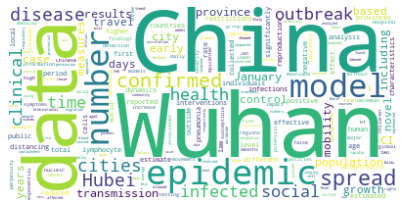

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][0] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][0]

[['Title: "The Effect of Inter-City Travel Restrictions on Geographical Spread of COVID-19: Evidence from Wuhan, China"'],
 ['Strong effect of socioeconomic levels on the spread and treatment of the 2019 novel 1 coronavirus (COVID-19) in China'],
 ['Epidemiological characteristics of 1212 COVID-19 patients in Henan, China',
  'medRxiv'],
 ['Age profile of susceptibility, mixing, and social distancing shape the dynamics of the novel coronavirus disease 2019 outbreak in China'],
 ['A data-driven assessment of early travel restrictions related to the spreading of the novel COVID-19 within mainland China'],
 ['A simple model to assess Wuhan lock-down effect and region efforts during COVID-19 epidemic in China Mainland'],
 ['Prevalence and clinical features of 2019 novel coronavirus disease (COVID-19) in the Fever Clinic of a teaching hospital in Beijing: a single-center, retrospective study'],
 ['Prediction of the clinical outcome of COVID-19 patients using T lymphocyte subsets with 340 ca

(-0.5, 399.5, 199.5, -0.5)

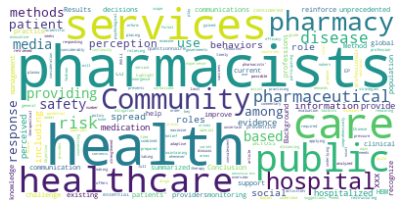

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][2] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][2]

[["On the frontline against COVID-19: Community pharmacists' contribution during a public health crisis"],
 ['Community pharmacists and communication in the time of COVID-19: Applying the health belief model'],
 ['SARS-CoV-2 outbreak: How can pharmacists help?'],
 ["Hospital pharmacists' pharmaceutical care for hospitalized patients with COVID-19: Recommendations and guidance from clinical experience"],
 ['Journal Pre-proof Medication management and adherence during the COVID-19 pandemic: Perspectives and experiences from LMICs Medication management and adherence during the COVID-19 pandemic: Perspectives and experiences from low-and middle-income countries Medication management and adherence during the COVID-19 pandemic: Perspectives 1 and experiences from low-and middle-income countries 2'],
 ['How to link patients with suspicious COVID-19 to health system from the community pharmacies? A route proposal'],
 ["Media's effect on shaping knowledge, awareness risk perceptions and communi

(-0.5, 399.5, 199.5, -0.5)

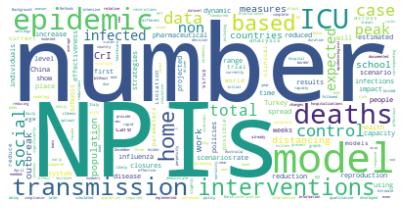

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][3] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][3]

[['Impact of non-pharmaceutical interventions on documented cases of COVID-19'],
 ['Effect of non-pharmaceutical interventions for containing the COVID-19 outbreak in China'],
 ['The effectiveness of non-pharmaceutical interventions in containing epidemics: a rapid review of the literature and quantitative assessment'],
 ['A statistical forecast of LOW mortality and morbidity due to COVID-19, in ARGENTINA and other Southern Hemisphere countries'],
 ['Bayesian Adaptive Clinical Trials for Anti-Infective Therapeutics during Epidemic Outbreaks *'],
 ['CAN-NPI: A Curated Open Dataset of Canadian Non-Pharmaceutical Interventions in Response to the Global COVID-19 Pandemic'],
 ['Data-Driven Study of the COVID-19 Pandemic via Age-Structured Modelling and Prediction of the Health System Failure in Brazil amid Diverse Intervention Strategies'],
 ['Defining high-value information for COVID-19 decision-making COVID-19 Statistics, Policy modeling and Epidemiology Collective (C-SPEC) 1'],
 ['Estima

(-0.5, 399.5, 199.5, -0.5)

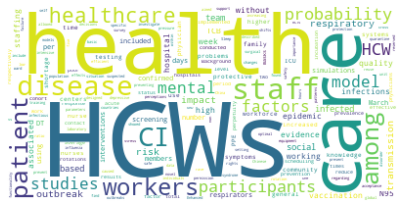

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][4] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][4]

[['Potential Role of Personal Protective Equipment Use in the Protection Against'],
 [''],
 ['TITLE PAGE The need of health policy perspective to protect Healthcare Workers during COVID-19 pandemic',
  'A GRADE rapid review on the N95 respirators effectiveness'],
 ['Cross-sectional Study Affiliations'],
 ['IMPACT OF VIRAL EPIDEMIC OUTBREAKS ON MENTAL HEALTH OF HEALTHCARE WORKERS: A RAPID SYSTEMATIC REVIEW'],
 ['Impact of healthcare worker shift scheduling on workforce preservation during the COVID-19 pandemic'],
 ['The risk of SARS-CoV-2 transmission in the healthcare setting and potential impact of cohorting strategies'],
 ['Acceptance and preference for COVID-19 vaccination in health-care workers (HCWs)'],
 ['SARS-CoV-2 infection in health care workers: a retrospective analysis and model study'],
 ['Novel Coronavirus (COVID-19) Knowledge and Perceptions: A Survey of Healthcare Workers'],
 ['COVID-19 in the Shadows of MERS-CoV in the Kingdom of Saudi Arabia'],
 ['Brief Communication']

(-0.5, 399.5, 199.5, -0.5)

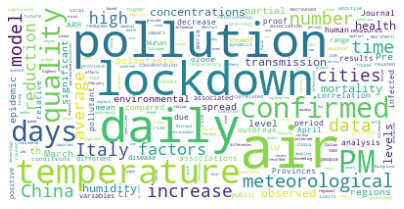

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][5] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][5]

[['COVID-19 higher induced mortality in Chinese regions with lower air quality'],
 ['Title: COVID-19 transmission in Mainland China is associated with temperature and humidity: a time-series analysis'],
 ['The Potential role of Particulate Matter in the Spreading of COVID-19 in Northern Italy: First Evidence-based Research Hypotheses'],
 ['TWO MECHANISMS FOR ACCELERATED DIFFUSION OF COVID- 19 OUTBREAKS IN REGIONS WITH HIGH INTENSITY OF POPULATION AND POLLUTING INDUSTRIALIZATION: THE AIR POLLUTION-TO-HUMAN AND HUMAN-TO-HUMAN TRANSMISSION DYNAMICS A B'],
 ['Meteorological factors and domestic new cases of coronavirus disease (COVID-19) in nine Asian cities: A time-series analysis'],
 ['Links between air pollution and COVID-19 in England'],
 ['Will COVID-19 pandemic diminish by summer-monsoon in India? Lesson from the first lockdown'],
 ['Role of temperature and humidity in the modulation of the doubling time of COVID-19 cases'],
 ['Effects of temperature variation and humidity on the mor

(-0.5, 399.5, 199.5, -0.5)

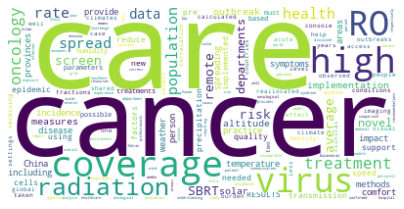

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][6] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][6]

[['Spread of SARS-CoV-2 Coronavirus likely constrained by climate'],
 [''],
 ['Implementation of a Novel Remote Physician SBRT Coverage Process during the Coronavirus Pandemic Corresponding Authors'],
 ['Eco-epidemiological assessment of the COVID-19 epidemic in China'],
 ['Running a Radiation Oncology Department at the Time of Coronavirus: An Italian Experience-NC-ND license (http://creativecommons.org/licenses/by-nc-nd/4.0/)',
  '* Corresponding author'],
 ['Journal Pre-proof Recommendations for Triage, Prioritization and Treatment of Breast Cancer Patients During the COVID-19 Pandemic Recommendations for Triage, Prioritization and Treatment of Breast Cancer Patients During the COVID-19 Pandemic Recommendations for Triage, Prioritization and Treatment of Breast Cancer Patients During the COVID- 19 Pandemic'],
 ["Journal Pre-proofs Short Communication Bracing for impact with new 4R's in the COVID-19 pandemic-a provincial thoracic radiation oncology consensus"],
 ['Oncology Nursing Dur

(-0.5, 399.5, 199.5, -0.5)

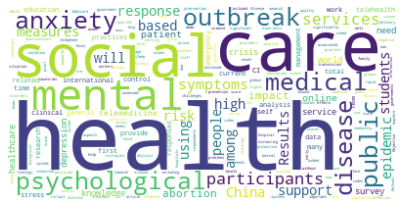

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][7] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][7]

[['Title: Impact of COVID-19 on psychiatric assessment in emergency and outpatient settings measured using electronic health records Running Title: COVID-19 and psychiatry notes'],
 ['Title Page Running Title: Rapid Review of Telemedicine of Coronavirus Disease Application of Telemedicine During the Coronavirus Disease Epidemics: A Rapid Review and Meta-Analysis'],
 ['Years of life lost due to the psychosocial consequences of COVID19 mitigation strategies based on Swiss data'],
 ['Rapid Utilization of Telehealth in a Comprehensive Cancer Center as a Response to COVID-19'],
 ['THE EMOTIONAL IMPACT OF THE ASRM GUIDELINES ON FERTILITY PATIENTS DURING THE COVID-19 PANDEMIC'],
 ['Knowledge and Beliefs of General Public of India on COVID-19: A Web- based Cross-sectional Survey'],
 ["A Nationwide Survey of UK cardiac surgeons' view on clinical decision making during the COVID-19 pandemic No conflict to disclose Corresponding author"],
 ['High risk of infection caused Posttraumatic Stress symp

(-0.5, 399.5, 199.5, -0.5)

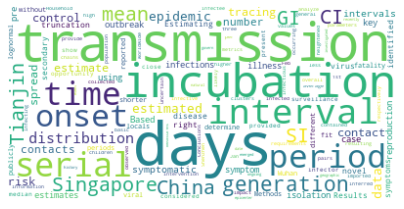

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][8] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][8]

[['Quantifying SARS-CoV-2 transmission suggests epidemic control with digital contact tracing'],
 ['Epidemiological parameters of coronavirus disease 2019: a pooled analysis of publicly reported individual data of 1155 cases from seven countries Summary Background'],
 ['Transmission interval estimates suggest pre-symptomatic spread of COVID-19'],
 ['Serial interval and generation interval for respectively the imported and local infectors estimated using reported contact-tracing data of COVID-19 in China'],
 ['Epidemiology and Transmission of COVID-19 in Shenzhen China: Analysis of 391 cases and 1,286 of their close contacts'],
 ['Title: The serial interval of COVID-19 from publicly reported confirmed cases Running Head: The serial interval of COVID-19'],
 ['Title: Serial interval of novel coronavirus (COVID-19) infections Correspondence to'],
 ['Estimating the generation interval for COVID-19 based on symptom onset data'],
 ['Incubation Period and Other Epidemiological Characteristics 

(-0.5, 399.5, 199.5, -0.5)

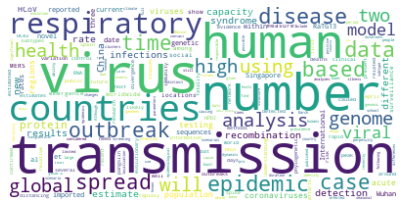

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][9] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][9]

[['Analysis Title: Regaining perspective on SARS-CoV-2 molecular tracing and its implications'],
 ['Coast-to-coast spread of SARS-CoV-2 in the United States revealed by genomic epidemiology'],
 ['Potential impact of seasonal forcing on a SARS-CoV-2 pandemic'],
 ['Dispersion of a new coronavirus SARS-CoV-2 by airlines in 2020: Temporal estimates of the outbreak in Mexico'],
 ['COVID-19: An Update on the Epidemiological, Genomic Origin, Phylogenetic study, India centric to Worldwide current status'],
 ['A Genomic Survey of SARS-CoV-2 Reveals Multiple Introductions into Northern California without a Predominant Lineage'],
 ['Population genomics insights into the recent evolution of SARS-CoV-2'],
 ['A Computational Model for Estimating the Progression of COVID-19 Cases in the US West and East Coasts'],
 ['The origin and underlying driving forces of the SARS-CoV-2 outbreak Running Title: Evolution at the early stage of SARS-CoV-2 spread'],
 ['REVEALING COVID-19 TRANSMISSION BY SARS-CoV-2 GE

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][1] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

In [ ]:
level_1_names[8][1][1]

[['Estimating the daily trend in the size of the COVID-19 infected population in Wuhan'],
 ['Early dynamics of transmission and control of COVID-19: a mathematical modelling study'],
 ['Estimating the number of undetected COVID-19 cases exported internationally from all of China'],
 ['Dynamic Estimation of Epidemiological Parameters of COVID-19 Outbreak and Effects of Interventions on Its Spread'],
 ['Estimation of COVID-19 outbreak size in Italy based on international case exportations'],
 ['Preliminary estimation of the novel coronavirus disease (COVID-19) cases in Iran: a modelling analysis based on overseas cases and air travel data'],
 ['Assessing the impact of reduced travel on exportation dynamics of novel coronavirus infection (COVID-19)'],
 ['Title: Estimation of COVID-2019 burden and potential for international dissemination of infection from Iran'],
 ['Articles Early dynamics of transmission and control of COVID-19: a mathematical modelling study'],
 ['Clinical Medicine Asse

(-0.5, 399.5, 199.5, -0.5)

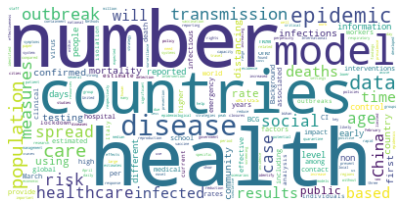

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][0] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][1][0]

[['Impact of COVID-19 pandemic on severity of illness and resources required during intensive care in the greater New York City area'],
 ['Inclusive Costs of NPI Measures for COVID-19 Pandemic: Three Approaches'],
 ['The closer to the Europe Union headquarters, the higher risk of COVID-19? Cautions regarding ecological studies of COVID-19'],
 ['If long-term suppression is not possible, how do we minimize mortality for COVID-19 and other emerging infectious disease outbreaks?'],
 ['The efficiency in the ordinary hospital bed management in Italy: an in-depth analysis of intensive care unit in the areas affected by COVID-19 before the outbreak'],
 ['A Web-based, Mobile Responsive Application to Screen Healthcare Workers for COVID Symptoms: Descriptive Study'],
 ['A Chronological and Geographical Analysis of Personal Reports of COVID-19 on Twitter'],
 [''],
 ['Mechanistic modeling of the SARS-CoV-2 disease map'],
 ['Reproducibility and reporting practices in COVID-19 preprint manuscripts']

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][2] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

In [ ]:
level_1_names[8][1][2]

[['Transmission routes of Covid-19 virus in the Diamond Princess Cruise ship'],
 ['In-flight Transmission Cluster of COVID-19: A Retrospective Case Series Running title: In-flight Transmission Cluster of COVID-19'],
 ['Estimating the infection and case fatality ratio for COVID-19 using age-adjusted data from the outbreak on the Diamond Princess cruise ship'],
 ['Transmission potential of the novel coronavirus (COVID-19) onboard the Diamond Princess Cruises Ship, 2020'],
 ['Taking Account of Asymptomatic Infections in Modeling the Transmission Potential of the COVID-19 Outbreak on the Diamond Princess Cruise Ship'],
 ['Can people with asymptomatic or pre-symptomatic COVID-19 infect others: a systematic review of primary data'],
 ['To appear in: Public Health'],
 ['Outbreak investigation in cargo ship in times of COVID-19 crisis, Port of Santos, Brazil'],
 ['Chronology of COVID-19 Cases on the Diamond Princess Cruise Ship and Ethical Considerations: A Report From Japan']]

(-0.5, 399.5, 199.5, -0.5)

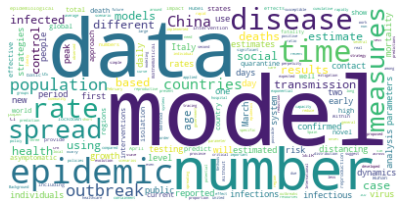

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][3] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][1][3]

[['Dynamics of Interacting Hotspots -I'],
 ['A SIDARTHE Model of COVID-19 Epidemic in Italy'],
 ['Analyzing the World-Wide Impact of Public Health Interventions on the Transmission Dynamics of COVID-19'],
 ['Population modeling of early COVID-19 epidemic dynamics in French regions and estimation of the lockdown impact on infection rate'],
 ['Relationship between Average Daily Temperature and Average Cumulative Daily Rate of Confirmed Cases of COVID-19'],
 ['Forecasting the Worldwide Spread of COVID-19 based on Logistic Model and SEIR Model'],
 [''],
 ['Noisy Pooled PCR for Virus Testing'],
 ['Importance of untested infectious individuals for the suppression of COVID-19 epidemics'],
 ['Modeling the COVID-19 epidemic in Okinawa'],
 ['A MODIFIED SEIR MODEL TO PREDICT THE COVID-19 OUTBREAK IN SPAIN AND ITALY: SIMULATING CONTROL SCENARIOS AND MULTI-SCALE EPIDEMICS'],
 ['Autocatalytic Model for Covid-19 Progression in a Country'],
 ['Forecasting the scale of the COVID-19 epidemic in Kenya'],

(-0.5, 399.5, 199.5, -0.5)

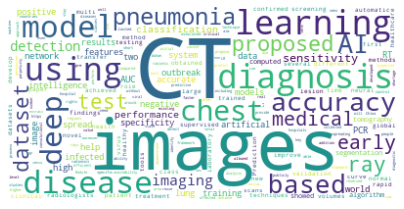

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][4] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][1][4]

[[''],
 ['Breast Cancer Prevention and Therapy, Ministry of Education'],
 ['Development and Evaluation of an AI System for COVID-19 Diagnosis'],
 ['AI-assisted CT imaging analysis for COVID-19 screening: Building and deploying a medical AI system in four weeks'],
 ['Research on CNN-based Models Optimized by Genetic Algorithm and Application in the Diagnosis of Pneumonia and COVID-19'],
 ['Automatic X-ray COVID-19 Lung Image Classification System based on Multi-Level Thresholding and Support Vector Machine'],
 ["Diagnosis and Prediction Model for COVID-19 Patient's Response to Treatment based on Convolutional Neural Networks and Whale Optimization Algorithm Using CT Images"],
 ['Deep learning Enables Accurate Diagnosis of Novel Coronavirus (COVID-19) with CT images'],
 ['AI-Driven CT-based quantification, staging and short-term outcome prediction of COVID-19 pneumonia'],
 ['Sample-Efficient Deep Learning for COVID-19 Diagnosis Based on CT Scans'],
 ['Inf-Net: Automatic COVID-19 Lung Inf

(-0.5, 399.5, 199.5, -0.5)

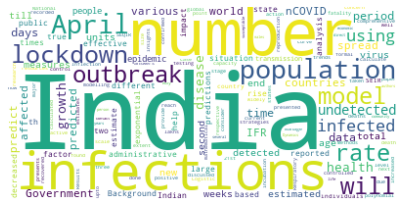

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][5] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][1][5]

[['How much of SARS-CoV-2 Infections is India detecting? A model-based estimation How much of SARS-CoV-2 Infections is India detecting? A model- based estimation'],
 ['A Comprehensive Analysis of COVID-19 Outbreak situation in India'],
 ['Recent update on COVID-19 in India: Is locking down the country enough?'],
 ['Estimation of undetected COVID-19 infections in India'],
 [''],
 ['COVID-19 in India: State-wise Analysis and Prediction'],
 ['Mathematical Analysis of a COVID-19 Epidemic Model by using Data Driven Epidemiological Parameters of Diseases Spread in India'],
 ['RISK ASSESMENT of nCOVID-19 PANDEMIC IN INDIA: A MATHEMATICAL MODEL AND SIMULATION'],
 ['Study of Epidemiological Characteristics and In-silico Analysis of the Effect of Interventions in the SARS-CoV-2 Epidemic in India Title: Study of Epidemiological Characteristics and In-silico Analysis of the Effect of Interventions in the SARS-CoV-2 Epidemic in India'],
 ['KEYWORDS']]

(-0.5, 399.5, 199.5, -0.5)

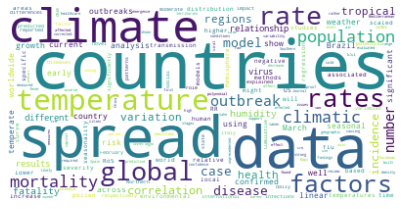

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][6] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][1][6]

[['Multiple drivers of the COVID-19 spread: role of climate, international mobility, and region-specific conditions'],
 ['Predict the next moves of COVID-19: reveal the temperate and tropical countries scenario'],
 ['Title: Climate Affects Global Patterns Of Covid-19 Early Outbreak Dynamics'],
 ['The Epidemic Severity Index: Estimating Relative Local Severity of Novel Disease Outbreaks The Epidemic Severity Index: Estimating Relative Local Severity of Novel Disease Outbreaks'],
 ['Spatial modeling cannot currently differentiate SARS-CoV-2 coronavirus and human distributions on the basis of climate in the United States'],
 ['Climatic factors influence COVID-19 outbreak as revealed by worldwide mortality'],
 ["Running Title: Global Biogeography of Disease Emergence Title In search for the hotspots of Disease X: A biogeographic approach to mapping the predictive risk of WHO's Blueprint Priority Diseases"],
 ['REGIONAL DETERMINANTS OF THE EXPANSION OF COVID-19 IN BRAZIL'],
 ['Title: No Evi

(-0.5, 399.5, 199.5, -0.5)

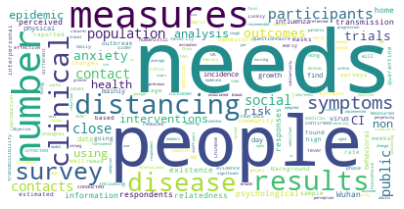

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][7] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][1][7]

[['Title: Perceptions of the Adult US Population regarding the Novel Coronavirus Outbreak Short title: Perceptions regarding Novel Coronavirus Outbreak'],
 ['Quantifying the impact of physical distance measures on the transmission of COVID-19 in the UK'],
 ['"The more I fear about COVID-19, the more I wear medical masks": A survey on risk perception and medical masks\' uses'],
 ['Core Outcome Set for Clinical Trials of COVID-19 based on Traditional Chinese and Western Medicine'],
 ['Measuring Icebergs: Using Different Methods to Estimate the Number of COVID-19 Cases in Portugal and Spain'],
 ['Estimation of true number of COVID-19 infected people in Japan using LINE questionnaire'],
 ['Community responses during the early phase of the COVID-19 epidemic in Hong Kong: risk 1 perception, information exposure and preventive measures 2 3 Background: Community responses are important for outbreak management during the early phase'],
 [''],
 ['Psychological responses, behavioral changes and p

(-0.5, 399.5, 199.5, -0.5)

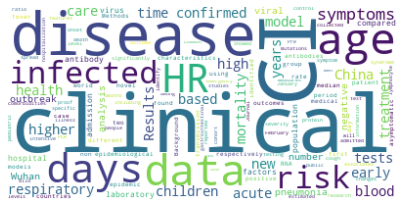

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][8] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][1][8]

[['Detection of COVID-19 Infection from Routine Blood Exams with Machine Learning: a Feasibility Study'],
 ['Caution: The clinical characteristics of COVID-19 patients at admission are changing'],
 ['Rapid in silico design of antibodies targeting SARS-CoV-2 using machine learning and supercomputing 1'],
 ['Title: Characteristics and outcomes of a cohort of SARS-CoV-2 patients in the Province of Reggio'],
 ['Characterizing the transmission and identifying the control strategy for COVID-19 through epidemiological modeling'],
 ['Inferring Timing of Infection Using Within-host SARS-CoV-2 Infection Dynamics Model: Are "Imported Cases" Truly Imported?'],
 ['Evolution and molecular characteristics of SARS-CoV-2 genome revealing the epidemiology mechanism of SARS-CoV-2 and coping with SARS-CoV-2 effectively'],
 ['Chest CT Scan of Hospitalized Patients with COVID-19: A Case-Control Study'],
 ['Features of 16,749 hospitalised UK patients with COVID-19 using the ISARIC WHO Clinical Characterisati

(-0.5, 399.5, 199.5, -0.5)

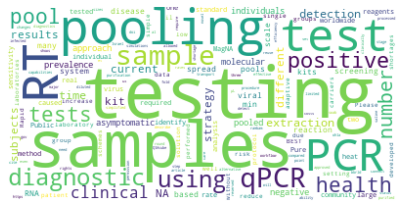

In [ ]:
single_words = ' '.join([j for i in level_1_names[8][1][9] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[8][1][9]

[['Assessment of Specimen Pooling to Conserve SARS CoV-2 Testing Resources DRC II 7035'],
 ['Blueprint for a Pop-up SARS-CoV-2 Testing Lab Authors : Innovative Genomics Institute SARS-CoV-2 Testing Consortium*'],
 ['Evaluation of Group Testing for SARS-CoV-2 RNA'],
 ['Bacteriology laboratory, Rambam Health Care Campus'],
 ['Efficient high throughput SARS-CoV-2 testing to detect asymptomatic carriers'],
 ['Tapestry: A Single-Round Smart Pooling Technique for COVID-19 Testing'],
 ['RAPID, LARGE-SCALE, AND EFFECTIVE DETECTION OF COVID-19 VIA NON-ADAPTIVE TESTING'],
 ['Multi-Stage Group Testing Improves Efficiency of Large-Scale COVID-19 Screening'],
 ['Title: An alternative workflow for molecular detection of SARS-CoV-2 -escape from the NA'],
 ['Sequential informed pooling approach to detect SARS-CoV2 infection'],
 ['Rapid point-of-care testing for SARS-CoV-2 in a community screening setting shows low sensitivity'],
 ['Multi-Stage Group Testing Improves Efficiency of Large-Scale COVID-19 

(-0.5, 399.5, 199.5, -0.5)

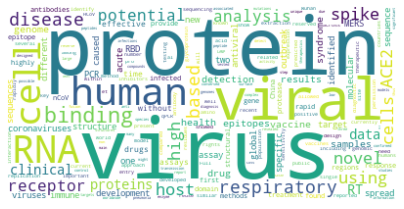

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][0] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][0]

[['Detection of Nucleocapsid Antibody to SARS-CoV-2 is More Sensitive than Antibody to Spike Protein in COVID-19 Patients 2 3 Running title: Analysis of SARS-CoV-2 N and S antibodies Word count text: 3,470'],
 ['A Large-scale Drug Repositioning Survey for SARS-CoV-2 Antivirals'],
 ['Development of CRISPR as a prophylactic strategy to combat novel coronavirus and influenza'],
 ['A Computational Approach to Design Potential siRNA Molecules as a Prospective Tool for Silencing Nucleocapsid Phosphoprotein and 2 Surface Glycoprotein Gene of SARS-CoV-2 3 4'],
 ['Structural and Evolutionary Analysis Indicate that the SARS-CoV-2 Mpro is an Inconvenient Target for Small-Molecule Inhibitors Design'],
 ['Prediction and Evolution of B Cell Epitopes of Surface Protein in SARS-CoV-2'],
 ['Massive and rapid COVID-19 testing is feasible by extraction- free SARS-CoV-2 RT-qPCR'],
 ['Identification of potential vaccine candidates against SARS-CoV-2, A step forward to fight novel coronavirus 2019-nCoV: A R

(-0.5, 399.5, 199.5, -0.5)

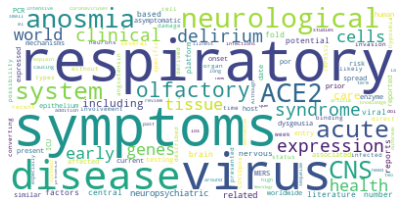

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][2] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][2]

[['Institutions: 1',
  'COVID-19 Task Force of the Young-Otolaryngologists of the International Federations of Oto-rhino-laryngological Societies (YO-IFOS)'],
 ['SARS-CoV-2 receptor and entry genes are expressed by sustentacular cells in the human olfactory neuroepithelium'],
 ['-Title: Coincidence of COVID-19 epidemic and olfactory dysfunction outbreak 2-Short title: COVID-19 and Anosmia 3-Authors: Electronic learning administrator, Iran Medical Council'],
 ['Sudden hyposmia as a prevalent symptom of COVID-19 infection'],
 ['The potential genetic network of human brain SARS-CoV-2 infection'],
 ['Non-neuronal expression of SARS-CoV-2 entry genes in the olfactory system suggests mechanisms underlying COVID-19-associated anosmia'],
 ['Augmented Curation of Unstructured Clinical Notes from a Massive EHR System Reveals Specific Phenotypic Signature of Impending COVID-19 Diagnosis'],
 ['Self-reported symptoms of covid-19 including symptoms most predictive of SARS-CoV- 2 infection, are herit

(-0.5, 399.5, 199.5, -0.5)

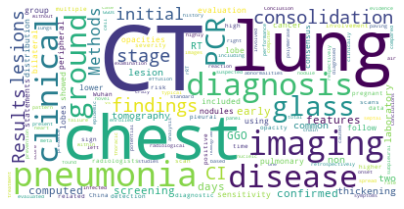

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][3] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][3]

[['Artificial intelligence applied on chest X-ray can aid in the diagnosis of COVID-19 infection: a first experience from Lombardy, Italy Artificial intelligence applied on chest X-ray can aid in the diagnosis of COVID-19 infection: a first experience from Lombardy, Italy'],
 ['Early Prediction of Disease Progression in 2019 Novel Coronavirus Pneumonia Patients Outside Wuhan with CT and Clinical Characteristics'],
 ['Jens Kleesiek, j.kleesiek@dkfz-heidelberg.de'],
 ['Ultra-High-Resolution CT Follow-Up in Patients with Imported Early-Stage'],
 ["Early chest computed tomography to diagnose COVID-19 from suspected patients: A multicenter retrospective study Authors' names"],
 ['Association between Clinical, Laboratory and CT Characteristics and RT-PCR Results in the Follow-up of COVID-19 patients'],
 ['Chest computed tomography (CT) scan findings in patients with COVID-19: a systematic review and meta-analysis Chest computed tomography (CT) scan findings in patients with COVID-19: a syste

(-0.5, 399.5, 199.5, -0.5)

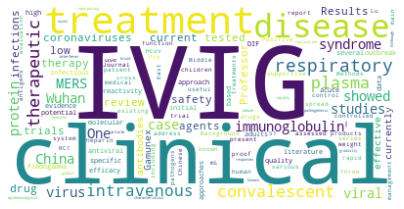

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][4] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][4]

[['Currently available intravenous immunoglobulin (Gamunex ® -C and Flebogamma ® DIF) contains antibodies reacting against SARS-CoV-2 antigens'],
 ['Clinical Efficacy of Intravenous Immunoglobulin Therapy in Critical Patients with COVID-19: A Multicenter Retrospective Cohort Study'],
 ['Title Page Running Title: Intravenous Immunoglobulin of COVID-19 Effectiveness of Intravenous Immunoglobulin for Children with Severe COVID-19: A Rapid Review'],
 ['High-Dose Intravenous Immunoglobulin as a Therapeutic Option for Deteriorating Patients With Coronavirus Disease 2019'],
 ['Journal Pre-proof Convalescent Plasma: Therapeutic Hope or Hopeless Strategy in the SARS-CoV-2 Pandemic Convalescent Plasma: Therapeutic Hope or Hopeless Strategy in the SARS-CoV-2 Pandemic'],
 ['The anti-viral facet of anti-rheumatic drugs: Lessons from COVID-19'],
 ['Clinical observation and management of COVID-19 patients'],
 ['Molecular Sciences Could Intravenous Immunoglobulin Collected from Recovered Coronavirus P

(-0.5, 399.5, 199.5, -0.5)

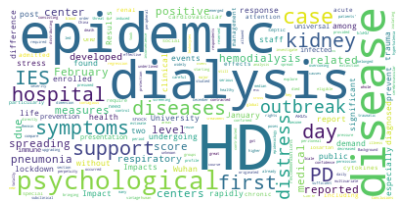

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][5] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][5]

[['Comparison of psychological distress and demand induced by COVID-19 during the lockdown period in patients undergoing peritoneal dialysis and hemodialysis: a cross-section study in a tertiary hospital Corresponding Author'],
 ['2019 novel coronavirus disease in hemodialysis (HD) patients: Report from one HD center in Wuhan, China'],
 ['Journal Pre-proof COVID-19 in Hemodialysis Patients: A Report of 5 Cases COVID-19 in Hemodialysis Patients: A Report of 5 Cases'],
 ['Clinical Practice: Review Article Nephron Should COVID-19 Concern Nephrologists? Why and to What Extent? The Emerging Impasse of Angiotensin Blockade Keywords Severe acute respiratory syndrome coronavirus · SARS-CoV-2 · COVID-19 · Renal and cardiac side effects · Angiotensin-converting enzyme inhibitors · Angiotensin receptor blockers'],
 ['Journal Pre-proof Management of the SARS-CoV-2 (Covid 19) coronavirus epidemic in hemodialysis units'],
 ['Management of Patients on Dialysis and With Kidney Transplantation During t

(-0.5, 399.5, 199.5, -0.5)

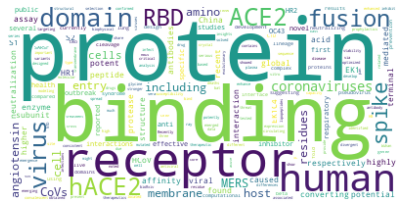

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][6] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][6]

[['The SARS-CoV-2 receptor-binding domain elicits a potent neutralizing response without antibody-dependent enhancement'],
 ['Genetic Variability of Human Angiotensin-Converting Enzyme 2 (hACE2) Among Various Ethnic Populations'],
 ['Biophysical characterization of the SARS-CoV-2 spike protein binding with the ACE2 receptor explains increased COVID-19 pathogenesis'],
 ['Broad and differential animal ACE2 receptor usage by SARS-CoV-2 1 2 Running Title: Broad animal ACE2 receptor usage by SARS-CoV-2'],
 ['SARS-CoV-2, an evolutionary perspective of interaction with human ACE2 reveals undiscovered amino acids necessary for complex stability'],
 ['Computational Design of Peptides to Block Binding of the SARS-CoV-2 Spike Protein to Human ACE2'],
 ['Inhibition of SARS-CoV-2 infection (previously 2019-nCoV) by a highly potent pan-coronavirus fusion inhibitor targeting its spike protein that harbors a high 2 capacity to mediate membrane fusion 3 Health, Beijing Key Laboratory for Animal Models 

(-0.5, 399.5, 199.5, -0.5)

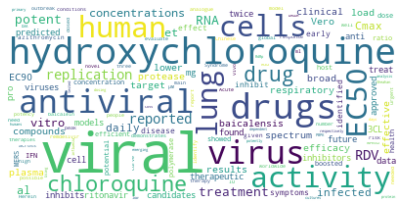

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][7] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][7]

[['Potency and timing of antiviral therapy as determinants of duration of SARS CoV-2 shedding and intensity of inflammatory response Introduction'],
 ['Scutellaria baicalensis extract and baicalein inhibit replication of SARS-CoV-2 and its 3C-like protease in vitro'],
 ['Reversal of Infected Host Gene Expression Identifies Repurposed Drug Candidates for COVID-19'],
 ['Hydroxychloroquine and azithromycin as a treatment of COVID-19: results of an open- label non-randomized clinical trial'],
 ['Potent Antiviral Activities of Type I Interferons to SARS-CoV-2 Infection 1 2 3'],
 ['Remdesivir potently inhibits SARS-CoV-2 in human lung cells and chimeric SARS-CoV expressing the SARS-CoV-2 RNA polymerase in mice'],
 ['Novel and potent inhibitors targeting DHODH, a rate-limiting enzyme in de novo pyrimidine biosynthesis, are broad-spectrum antiviral against RNA viruses including newly emerged coronavirus SARS-CoV-2'],
 ['Prioritisation of potential anti-SARS-CoV-2 drug repurposing opportunities

(-0.5, 399.5, 199.5, -0.5)

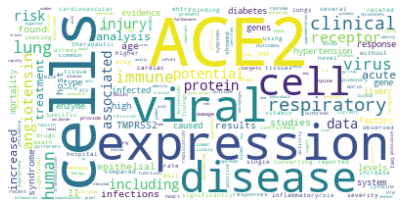

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][8] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][8]

[['SARS-CoV-2 Entry Genes Are Most Highly Expressed in Nasal Goblet and Ciliated Cells within Human Airways'],
 ['Neutrophil extracellular traps (NETs) as markers of disease severity in COVID-19'],
 ['TMPRSS2 and TMPRSS4 mediate SARS-CoV-2 infection of human small intestinal 1 enterocytes 2 3'],
 ['Multiscale 3-dimensional pathology findings of COVID-19 diseased lung using high-resolution cleared tissue microscopy'],
 ['Epigenetic dysregulation of ACE2 and interferon-regulated genes might suggest increased COVID-19 susceptibility and severity in lupus patients'],
 ['Genetic Profiles in Pharmacogenes Indicate Personalized Drug Therapy for COVID-19 Running title: COVID-19 pharmacogenetics'],
 ['Comparative in vitro transcriptomic analyses of COVID-19 candidate therapy hydroxychloroquine suggest limited immunomodulatory evidence of SARS-CoV-2 host response genes',
  'AUTHORS'],
 ['Lack of association between genetic variants at ACE2 and TMPRSS2 genes involved in SARS-CoV-2 infection and h

(-0.5, 399.5, 199.5, -0.5)

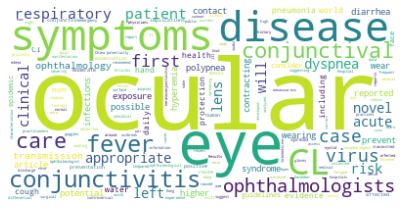

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][9] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][9]

[['Ocular manifestations and clinical characteristics of 534 cases of COVID-19 in China: A cross-sectional study'],
 ['Ocular conjunctival inoculation of SARS-CoV-2 can cause mild COVID-19 in Rhesus macaques 2 3'],
 ['The infection evidence of SARS-COV-2 in ocular surface： a single-center cross-sectional study Funding Sources'],
 ['Comparison of severe and non-severe COVID-19 pneumonia: review and meta-analysis'],
 ['The COVID-19 pandemic: Important considerations for contact lens practitioners'],
 ['Can the Coronavirus Disease 2019 (COVID-19) Affect the Eyes? A Review of Coronaviruses and Ocular Implications in Humans and Animals'],
 [''],
 ["Journal Pre-proof The COVID-19 pandemic from an ophthalmologist's perspective The COVID-19 pandemic from an ophthalmologist's perspective"],
 ['ARTICLE IN PRESS Supplementary Material ARTICLE IN PRESS'],
 ['SARS-CoV-2 in the ocular surface of COVID- 19 patients'],
 ['A comprehensive Chinese experience against SARS-CoV-2 in ophthalmology']]

(-0.5, 399.5, 199.5, -0.5)

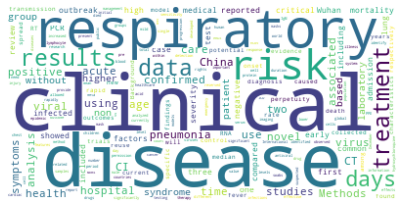

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][0] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][1][0]

[['Crisis-Critical Intellectual Property: Considerations during the COVID-19 Pandemic Version 1 (April 2020) Centre for Technology Management (CTM) Working Paper Series We identify four stakeholder groups that are particularly concerned with IP related challenges during a pandemic',
  "These include (i) governments, (ii) organisations owning existing Crisis- Critical IP (incumbents in Crisis-Critical Sectors), (iii) manufacturing firms from other sectors normally not producing Crisis-Critical Products suddenly rushing into Crisis-Critical Sectors to support the manufacturing of Crisis-Critical Products (new entrants) in the quantities that far exceed incumbents' production capacities and (iv) voluntary grassroot initiatives that are formed during a pandemic, often by highly skilled engineers and scientists to contribute to the development and dissemination of Crisis-Critical Products",
  'This paper discusses IP challenges faced by those stakeholders during a pandemic related to the de

(-0.5, 399.5, 199.5, -0.5)

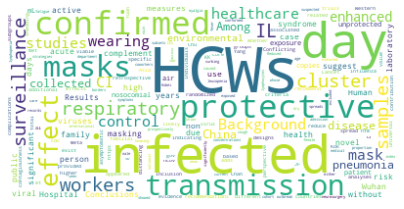

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][1] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][1][1]

[['Environmental contamination of the SARS-CoV-2 in healthcare premises: An urgent call for protection for healthcare workers'],
 ['Efficacy of face mask in preventing respiratory virus transmission: a systematic review and meta-analysis'],
 ['SARS-CoV-2 infection in 86 healthcare workers in two Dutch hospitals in March 2020 Corresponding author'],
 ['The Time for Universal Masking of the Public for Coronavirus Disease 2019 Is Now'],
 ['Journal Pre-proof A Cluster of Health Care Workers with COVID-19 Pneumonia Caused by SARS- CoV-2'],
 [''],
 [''],
 ['Escalating infection control response to the rapidly evolving epidemiology of the coronavirus disease 2019 (COVID-19) due to SARS-CoV-2 in Hong Kong']]

(-0.5, 399.5, 199.5, -0.5)

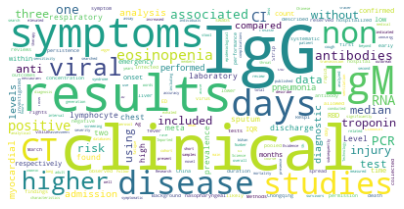

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][2] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][1][2]

[['CT in relation to RT-PCR in diagnosing COVID-19 in the Netherlands: a prospective study'],
 ['Running title: Aerosol transmission of SARS-CoV-2 Evidence for probable aerosol transmission of SARS-CoV-2 in a poorly ventilated restaurant'],
 ['Comparison of Four Molecular In Vitro Diagnostic Assays for the Detection of SARS-CoV-2 in 1 Nasopharyngeal Specimens 2 3 Running title: Comparison of Four Molecular Assays for SARS-CoV-2 4 5'],
 ['TITLE PAGE Eosinopenia Phenotype in Patients with Coronavirus Disease 2019: A Multi-center Retrospective Study from Anhui, China'],
 ['LONG-TERM CLINICAL OUTCOMES IN SURVIVORS OF CORONAVIRUS OUTBREAKS AFTER HOSPITALISATION OR ICU ADMISSION: A SYSTEMATIC REVIEW AND META-ANALYSIS OF FOLLOW-UP STUDIES'],
 ['The production and clinical implications of SARS-CoV-2 antibodies The production and clinical implications of SARS-CoV-2 antibodies'],
 ['Title Page Running Title: glucocorticoids for COVID-19 Effectiveness and Safety of Glucocorticoids to Treat COVID-

(-0.5, 399.5, 199.5, -0.5)

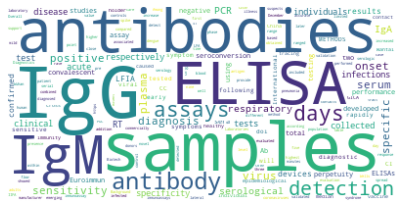

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][3] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][1][3]

[['Evaluation of antibody testing for SARS-CoV-2 using ELISA and lateral flow immunoassays'],
 ['novel coronavirus (SARS-CoV-2) infections during the 2 COVID-19 outbreak 3'],
 ['Antibody tests in detecting SARS-CoV-2 infection: a meta-analysis'],
 ['SARS-CoV-2 specific antibody responses in COVID-19 patients'],
 ['A preliminary study on serological assay for severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) in 238 2 admitted hospital patients'],
 ['Title: Test performance evaluation of SARS-CoV-2 serological assays Author Names and Affiliations: ** *Co-first author **Co-corresponding author'],
 ['Evaluation of Enzyme-Linked Immunoassay and Colloidal Gold- Immunochromatographic Assay Kit for Detection of Novel Coronavirus (SARS-Cov-2) Causing an Outbreak of Pneumonia (COVID-19)'],
 ['Serology characteristics of SARS-CoV-2 infection since the exposure and post symptoms onset'],
 ['Evaluation of nine commercial SARS-CoV-2 immunoassays'],
 ['TITLE PAGE Manuscript title: Cross-re

(-0.5, 399.5, 199.5, -0.5)

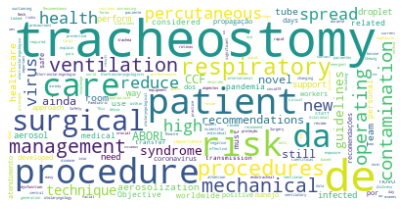

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][4] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][1][4]

[['Systematic review of international guidelines for tracheostomy in COVID-19 patients'],
 ['State of the Art Review Tracheostomy Considerations during the COVID-19 Pandemic'],
 ['ARTICLE IN PRESS +Model Brazilian Journal of OTORHINOLARYNGOLOGY An update on COVID-19 for the otorhinolaryngologist --- a Brazilian Association of Otolaryngology and Cervicofacial Surgery (ABORL-CCF) Position Statement ଝ PALAVRAS CHAVE'],
 ['Journal Pre-proof Novel Percutaneous Tracheostomy for Critically Ill Patients with COVID-19 Novel Percutaneous Tracheostomy for Critically Ill Patients with COVID-19'],
 [''],
 ['ARTICLE IN PRESS Auris Nasus Larynx xxx (xxxx) xxx Anesthetic and surgical management of tracheostomy in a patient with COVID-19'],
 ['ARTICLE IN PRESS G Model ScienceDirect French consensus regarding precautions during tracheostomy and post-tracheostomy care in the context of COVID-19 pandemic'],
 ['Brief Title: Transmission of COVID-19 During Tracheostomy'],
 ['International Journal of Pediatr

(-0.5, 399.5, 199.5, -0.5)

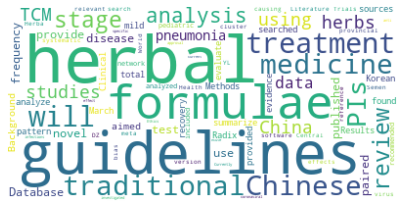

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][5] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][1][5]

[[''],
 ['Herbal medicine and pattern identification for treating COVID-19: a rapid review of guidelines'],
 [''],
 ['-NC-ND license Herbal medicine for treatment of children diagnosed with COVID-19: A review of guidelines'],
 ['Highlights of Traditional Chinese Medicine Frontline Expert Advice in the China National Guideline for COVID-19'],
 ['Traditional Chinese herbal medicine for treating novel coronavirus (COVID-19) pneumonia: protocol for a systematic review and meta-analysis'],
 ['Traditional Chinese Medicine in the Treatment of Patients Infected with 2019-New Coronavirus (SARS-CoV-2): A Review and Perspective']]

(-0.5, 399.5, 199.5, -0.5)

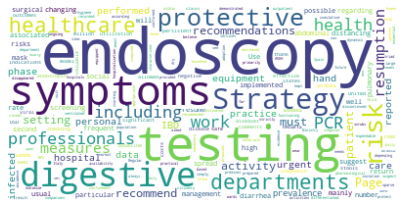

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][6] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][1][6]

[['Evidence for gastrointestinal infection of SARS-CoV-2 1'],
 ['SARS-COV-2 infection (coronavirus disease 2019) for the gastrointestinal consultant'],
 ['Gastrointestinal and liver manifestations in patients with COVID-19'],
 ['Hepatic and gastrointestinal involvement in coronavirus disease 2019 (COVID-19): What do we know till now?'],
 ['Coronavirus (COVID-19) outbreak: what the department of endoscopy should know'],
 ['Journal Pre-proof Resumption of activity in gastroenterology departments',
  'Recommendations by SEPD, AEEH, GETECCU and AEG'],
 ['19?'],
 ['Rapid Review Endoscopy in inflammatory bowel diseases during the COVID-19 pandemic and post-pandemic period'],
 ['COVID-19 polymerase chain reaction testing before endoscopy: an economic analysis'],
 ['Journal Pre-proof A proposal for the return to routine endoscopy during the COVID-19 pandemic Title: A proposal for the return to routine endoscopy during the COVID-19 pandemic Short Title: Endoscopy during the COVID-19 pandemic']]

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][7] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

In [ ]:
level_1_names[9][1][7]

[['Steroid-responsive severe encephalopathy in SARS-CoV-2 infection'],
 ['Title page Title: Acute myelitis after SARS-CoV-2 infection: a case report Acute myelitis after SARS-CoV-2 infection: a case report'],
 ['Neurological Manifestations of Hospitalized Patients with COVID-19 in Wuhan, China: a retrospective case series study'],
 ['Journal Pre-proof Guillain-Barré Syndrome associated with SARS-CoV-2 infection Guillain-Barré Syndrome associated with SARS-CoV-2 infection'],
 ['Epilepsy and COVID-19: Associations and important considerations SARS-CoV-2: severe acute respiratory syndrome coronavirus 2 CDC: Center for Disease Control and Prevention'],
 ['Severe cerebral involvement in adult-onset hemophagocytic lymphohistiocytosis'],
 ['Guillain Barre syndrome associated with COVID-19 infection: A case report'],
 ['Central nervous system manifestations of COVID-19: A systematic review'],
 ['Resuscitation'],
 ['']]

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][8] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

In [ ]:
level_1_names[9][1][8]

[['Clinical Characteristics of Coronavirus Disease 2019 (COVID-19): An Updated Systematic Review'],
 ['Prevalence, Severity and Mortality associated with COPD and Smoking in patients with COVID-19: A Rapid Systematic Review and Meta-Analysis Authors contributions'],
 [''],
 ['Smoking is Associated with COVID-19 Progression: A Meta-Analysis'],
 [''],
 ['Editorial Tobacco Induced Diseases COVID-19 and smoking: A systematic review of the evidence']]

(-0.5, 399.5, 199.5, -0.5)

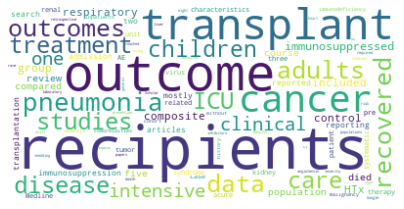

In [ ]:
single_words = ' '.join([j for i in level_1_names[9][1][9] for j in i])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
level_1_names[9][1][9]

[[''],
 ['Cardiovascular Considerations for Patients, Health Care Workers, and Health Systems During the Coronavirus Disease 2019 (COVID-19) Pandemic'],
 ['COVID-19 in the Cancer Patient General Articles aNeStHeSia & aNalGeSia'],
 ['Renal Disease'],
 ['Journal Pre-proof A single center observational study of the clinical characteristics and short-term outcome of 20 kidney transplant patients admitted for SARS-CoV2 pneumonia',
  'Early experience of COVID -19 infection in kidney transplant patients -Italian experience* *Single center observational study of the clinical characteristics and short-term outcome of 20 kidney transplant patients admitted for SARS-CoV2 pneumonia'],
 [''],
 [''],
 [''],
 ['How is immunosuppressive status affecting children and adults in SARS-CoV-2 infection? A systematic review How is immunosuppressive status affecting children and adults in SARS-CoV-2 infection? A systematic review'],
 ['COVID Q2 -19 infection in kidney transplant recipients Q1 Q29'],
 ['EPIDE

In [ ]:
"""
This cell is customized for data on my laptop. 
"""

# Define path of data
#data = 'data/'
articles_file = 'covid_articles_updated.p'


# Open the file
dict_articles = pickle.load(open(articles_file, 'rb'))


with open('level_1_clusters.pickle', 'rb') as handle:
    level_1 = pickle.load(handle)
    
level_1_names = defaultdict(list)
for k, a in level_1.items():
    for i in a:
        level_1_names[k].append(dict_articles[i]['title'])
        
with open('level_2_cluster_8.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['title'])
        
level_1_names[8] = level_2_names



with open('level_3_cluster_8_1.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['title'])
        
level_1_names[8][1] = level_2_names

with open('level_2_cluster_9.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['title'])
        
level_1_names[9] = level_2_names

with open('level_3_cluster_9_1.pickle', 'rb') as handle:
    level_2 = pickle.load(handle)
    
level_2_names = defaultdict(list)
for k, a in level_2.items():
    for i in a:
        level_2_names[k].append(dict_articles[i]['title'])
        
level_1_names[9][1] = level_2_names

# Macroareas

(-0.5, 399.5, 199.5, -0.5)

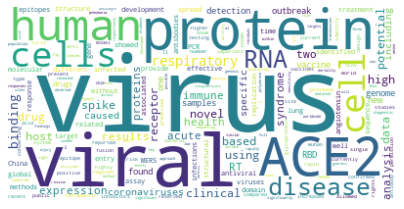

In [ ]:
single_words = ''
list_clusters = [level_1_names[5], level_1_names[6], level_1_names[7], level_1_names[9][0], level_1_names[9][6], level_1_names[9][8]]
for d in list_clusters:
    single_words += ' '.join([j for i in d for j in i])




wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
list_clusters = [level_1_names[5], level_1_names[6], level_1_names[7], level_1_names[9][0], level_1_names[9][6], level_1_names[9][8]]
len_c = np.sum([len(i) for i in list_clusters])
print(len_c)
print('\n\n\n\n')

titles_articles = [k for i in list_clusters for k in i]
for t in titles_articles:
    print(t)

616





['Global profiling of SARS-CoV-2 specific IgG/ IgM responses of convalescents using a proteome microarray']
['Analysis of SARS-CoV-2 Antibodies in COVID-19 Convalescent Plasma using a Coronavirus Antigen Microarray']
['Distinct early IgA profile may determine severity of COVID-19 symptoms: an immunological case series']
['Mucin 4 Protects Female Mice from Coronavirus Pathogenesis']
['ACE2 and TMPRSS2 variants and expression as candidates to sex and country differences in COVID-19 severity in Italy']
['']
['Analysis of Serologic Cross-Reactivity Between Common Human Coronaviruses and SARS-CoV-2 Using Coronavirus Antigen Microarray']
['Application and optimization of RT-PCR in diagnosis of SARS-CoV-2 infection']
['Recent advances and perspectives of nucleic acid detection for coronavirus-NC-ND license (http://creativecommons.org/licenses/by-nc-nd/4.0/)']
['Journal Pre-proof Comparison of four new commercial serologic assays for determination of SARS-CoV-2 IgG Comparison of four 

['Is the ACE2 Overexpression a Risk Factor for COVID-19 Infection?']
['To appear in: Carbohydrate Polymers']
['Journal Pre-proof Potential therapeutic effects of dipyridamole in the severely ill patients with COVID-19 Potential therapeutic effects of dipyridamole in the severely ill patients with COVID-19']
['Clinical trials on drug repositioning for COVID-19 treatment']
['14:1022; www.ecancer.org']
['COVID-19 and treatment with NSAIDs and corticosteroids: should we be limiting their use in the clinical setting?']
['Prognostic value of NT-proBNP in patients with severe COVID-19']
['Saliva: potential diagnostic value and transmission of 2019- nCoV']
['']
['Renin-angiotensin system inhibitors improve the clinical outcomes of COVID-19 patients with hypertension']
['Expression of the SARS-CoV-2 cell receptor gene ACE2 in a wide variety of human tissues']
['Clinical Medicine Editorial Smoking Upregulates Angiotensin-Converting Enzyme-2 Receptor: A Potential Adhesion Site for Novel Coronavir

In [ ]:
single_words = ''
list_clusters = [level_1_names[8][1][7], level_1_names[8][2], level_1_names[8][3], level_1_names[8][4], level_1_names[8][7]]
for d in list_clusters:
    single_words += ' '.join([j for i in d for j in i])




wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

In [ ]:
list_clusters = [level_1_names[8][1][7], level_1_names[8][2], level_1_names[8][3], level_1_names[8][4], level_1_names[8][7]]
len_c = np.sum([len(i) for i in list_clusters])
print(len_c)
print('\n\n\n\n')

titles_articles = [k for i in list_clusters for k in i]
for t in titles_articles:
    print(t)

241





['Title: Perceptions of the Adult US Population regarding the Novel Coronavirus Outbreak Short title: Perceptions regarding Novel Coronavirus Outbreak']
['Quantifying the impact of physical distance measures on the transmission of COVID-19 in the UK']
['"The more I fear about COVID-19, the more I wear medical masks": A survey on risk perception and medical masks\' uses']
['Core Outcome Set for Clinical Trials of COVID-19 based on Traditional Chinese and Western Medicine']
['Measuring Icebergs: Using Different Methods to Estimate the Number of COVID-19 Cases in Portugal and Spain']
['Estimation of true number of COVID-19 infected people in Japan using LINE questionnaire']
['Community responses during the early phase of the COVID-19 epidemic in Hong Kong: risk 1 perception, information exposure and preventive measures 2 3 Background: Community responses are important for outbreak management during the early phase']
['']
['Psychological responses, behavioral changes and public pe

(-0.5, 399.5, 199.5, -0.5)

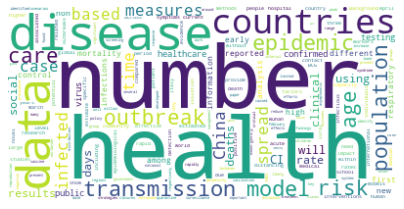

In [ ]:
single_words = ''
list_clusters = [level_1_names[9][1][1], level_1_names[8][1][8], level_1_names[8][8], level_1_names[8][9], level_1_names[8][1][0]]
for d in list_clusters:
    single_words += ' '.join([j for i in d for j in i])




wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
list_clusters = list_clusters = [level_1_names[9][1][1], level_1_names[8][1][8], level_1_names[8][8], level_1_names[8][9], level_1_names[8][1][0]]
len_c = np.sum([len(i) for i in list_clusters])
print(len_c)
print('\n\n\n\n')

titles_articles = [k for i in list_clusters for k in i]
for t in titles_articles:
    print(t)

550





['Environmental contamination of the SARS-CoV-2 in healthcare premises: An urgent call for protection for healthcare workers']
['Efficacy of face mask in preventing respiratory virus transmission: a systematic review and meta-analysis']
['SARS-CoV-2 infection in 86 healthcare workers in two Dutch hospitals in March 2020 Corresponding author']
['The Time for Universal Masking of the Public for Coronavirus Disease 2019 Is Now']
['Journal Pre-proof A Cluster of Health Care Workers with COVID-19 Pneumonia Caused by SARS- CoV-2']
['']
['']
['Escalating infection control response to the rapidly evolving epidemiology of the coronavirus disease 2019 (COVID-19) due to SARS-CoV-2 in Hong Kong']
['Detection of COVID-19 Infection from Routine Blood Exams with Machine Learning: a Feasibility Study']
['Caution: The clinical characteristics of COVID-19 patients at admission are changing']
['Rapid in silico design of antibodies targeting SARS-CoV-2 using machine learning and supercomputing 1'

(-0.5, 399.5, 199.5, -0.5)

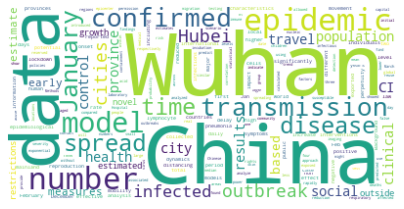

In [ ]:
single_words = ''
list_clusters = [level_1_names[8][1][1], level_1_names[8][0]]
for d in list_clusters:
    single_words += ' '.join([j for i in d for j in i])




wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
list_clusters = [level_1_names[8][1][1], level_1_names[8][0]]
len_c = np.sum([len(i) for i in list_clusters])
print(len_c)
print('\n\n\n\n')

titles_articles = [k for i in list_clusters for k in i]
for t in titles_articles:
    print(t)

78





['Estimating the daily trend in the size of the COVID-19 infected population in Wuhan']
['Early dynamics of transmission and control of COVID-19: a mathematical modelling study']
['Estimating the number of undetected COVID-19 cases exported internationally from all of China']
['Dynamic Estimation of Epidemiological Parameters of COVID-19 Outbreak and Effects of Interventions on Its Spread']
['Estimation of COVID-19 outbreak size in Italy based on international case exportations']
['Preliminary estimation of the novel coronavirus disease (COVID-19) cases in Iran: a modelling analysis based on overseas cases and air travel data']
['Assessing the impact of reduced travel on exportation dynamics of novel coronavirus infection (COVID-19)']
['Title: Estimation of COVID-2019 burden and potential for international dissemination of infection from Iran']
['Articles Early dynamics of transmission and control of COVID-19: a mathematical modelling study']
['Clinical Medicine Assessing the I

(-0.5, 399.5, 199.5, -0.5)

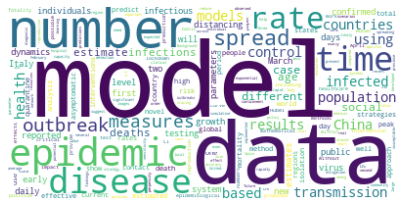

In [ ]:
single_words = ''
list_clusters = [level_1_names[8][1][3], level_1_names[8][1][4]]
for d in list_clusters:
    single_words += ' '.join([j for i in d for j in i])




wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
list_clusters = [level_1_names[8][1][3], level_1_names[8][1][4]]
len_c = np.sum([len(i) for i in list_clusters])
print(len_c)
print('\n\n\n\n')

titles_articles = [k for i in list_clusters for k in i]
for t in titles_articles:
    print(t)

461





['Dynamics of Interacting Hotspots -I']
['A SIDARTHE Model of COVID-19 Epidemic in Italy']
['Analyzing the World-Wide Impact of Public Health Interventions on the Transmission Dynamics of COVID-19']
['Population modeling of early COVID-19 epidemic dynamics in French regions and estimation of the lockdown impact on infection rate']
['Relationship between Average Daily Temperature and Average Cumulative Daily Rate of Confirmed Cases of COVID-19']
['Forecasting the Worldwide Spread of COVID-19 based on Logistic Model and SEIR Model']
['']
['Noisy Pooled PCR for Virus Testing']
['Importance of untested infectious individuals for the suppression of COVID-19 epidemics']
['Modeling the COVID-19 epidemic in Okinawa']
['A MODIFIED SEIR MODEL TO PREDICT THE COVID-19 OUTBREAK IN SPAIN AND ITALY: SIMULATING CONTROL SCENARIOS AND MULTI-SCALE EPIDEMICS']
['Autocatalytic Model for Covid-19 Progression in a Country']
['Forecasting the scale of the COVID-19 epidemic in Kenya']
['Predicting cli

(-0.5, 399.5, 199.5, -0.5)

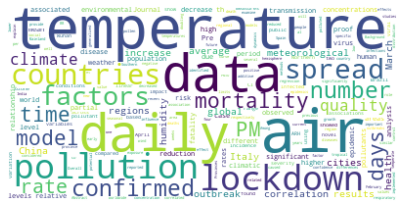

In [ ]:
single_words = ''
list_clusters = [level_1_names[8][5], level_1_names[8][1][6]]
for d in list_clusters:
    single_words += ' '.join([j for i in d for j in i])




wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
list_clusters = [level_1_names[8][5], level_1_names[8][1][6]]
len_c = np.sum([len(i) for i in list_clusters])
print(len_c)
print('\n\n\n\n')

titles_articles = [k for i in list_clusters for k in i]
for t in titles_articles:
    print(t)

51





['COVID-19 higher induced mortality in Chinese regions with lower air quality']
['Title: COVID-19 transmission in Mainland China is associated with temperature and humidity: a time-series analysis']
['The Potential role of Particulate Matter in the Spreading of COVID-19 in Northern Italy: First Evidence-based Research Hypotheses']
['TWO MECHANISMS FOR ACCELERATED DIFFUSION OF COVID- 19 OUTBREAKS IN REGIONS WITH HIGH INTENSITY OF POPULATION AND POLLUTING INDUSTRIALIZATION: THE AIR POLLUTION-TO-HUMAN AND HUMAN-TO-HUMAN TRANSMISSION DYNAMICS A B']
['Meteorological factors and domestic new cases of coronavirus disease (COVID-19) in nine Asian cities: A time-series analysis']
['Links between air pollution and COVID-19 in England']
['Will COVID-19 pandemic diminish by summer-monsoon in India? Lesson from the first lockdown']
['Role of temperature and humidity in the modulation of the doubling time of COVID-19 cases']
['Effects of temperature variation and humidity on the mortality of

(-0.5, 399.5, 199.5, -0.5)

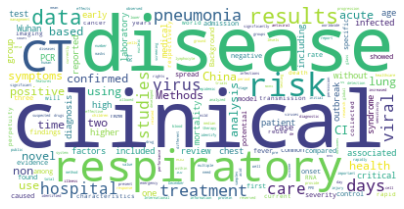

In [ ]:
single_words = ''
list_clusters = [level_1_names[9][2], level_1_names[9][3], level_1_names[9][1][0], level_1_names[9][1][4]]
for d in list_clusters:
    single_words += ' '.join([j for i in d for j in i])




wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
list_clusters = [level_1_names[9][2], level_1_names[9][3], level_1_names[9][1][0], level_1_names[9][1][4]]
len_c = np.sum([len(i) for i in list_clusters])
print(len_c)
print('\n\n\n\n')

titles_articles = [k for i in list_clusters for k in i]
for t in titles_articles:
    print(t)

788





['Institutions: 1', 'COVID-19 Task Force of the Young-Otolaryngologists of the International Federations of Oto-rhino-laryngological Societies (YO-IFOS)']
['SARS-CoV-2 receptor and entry genes are expressed by sustentacular cells in the human olfactory neuroepithelium']
['-Title: Coincidence of COVID-19 epidemic and olfactory dysfunction outbreak 2-Short title: COVID-19 and Anosmia 3-Authors: Electronic learning administrator, Iran Medical Council']
['Sudden hyposmia as a prevalent symptom of COVID-19 infection']
['The potential genetic network of human brain SARS-CoV-2 infection']
['Non-neuronal expression of SARS-CoV-2 entry genes in the olfactory system suggests mechanisms underlying COVID-19-associated anosmia']
['Augmented Curation of Unstructured Clinical Notes from a Massive EHR System Reveals Specific Phenotypic Signature of Impending COVID-19 Diagnosis']
['Self-reported symptoms of covid-19 including symptoms most predictive of SARS-CoV- 2 infection, are heritable']
[

(-0.5, 399.5, 199.5, -0.5)

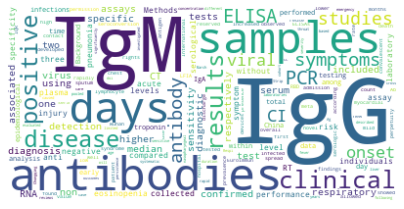

In [ ]:
single_words = ''
list_clusters = [level_1_names[9][1][3],  level_1_names[9][1][2]]
for d in list_clusters:
    single_words += ' '.join([j for i in d for j in i])




wordcloud = WordCloud(stopwords=stop_words, background_color="white", 
                               normalize_plurals = False,
                              collocations = False).generate(single_words)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")

In [ ]:
list_clusters = [level_1_names[9][1][3],  level_1_names[9][1][2]]
len_c = np.sum([len(i) for i in list_clusters])
print(len_c)
print('\n\n\n\n')

titles_articles = [k for i in list_clusters for k in i]
for t in titles_articles:
    print(t)

32





['Evaluation of antibody testing for SARS-CoV-2 using ELISA and lateral flow immunoassays']
['novel coronavirus (SARS-CoV-2) infections during the 2 COVID-19 outbreak 3']
['Antibody tests in detecting SARS-CoV-2 infection: a meta-analysis']
['SARS-CoV-2 specific antibody responses in COVID-19 patients']
['A preliminary study on serological assay for severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) in 238 2 admitted hospital patients']
['Title: Test performance evaluation of SARS-CoV-2 serological assays Author Names and Affiliations: ** *Co-first author **Co-corresponding author']
['Evaluation of Enzyme-Linked Immunoassay and Colloidal Gold- Immunochromatographic Assay Kit for Detection of Novel Coronavirus (SARS-Cov-2) Causing an Outbreak of Pneumonia (COVID-19)']
['Serology characteristics of SARS-CoV-2 infection since the exposure and post symptoms onset']
['Evaluation of nine commercial SARS-CoV-2 immunoassays']
['TITLE PAGE Manuscript title: Cross-reaction of s